In [62]:
# Imports
import time
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt

In [63]:
# Fixed Point Iteration Method
def fixed_point_iteration(f, p0, tol, max_iter):
    start = time.time()
    progress, p = [], 0.
    for i in range(1, max_iter):
        p = f(p0)
        progress.append(p)
        if abs(f(p)) < tol:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

In [64]:
def newton(f, p0, tol, max_iter):
    start = time.time()
    progress = []
    for i in range(1, max_iter):
        progress.append(p0)
        p1 = p0 - f(p0) / misc.derivative(f, p0)
        if abs(p1 - p0) < tol:
            end = time.time()
            return "Success", p0, i, progress, end-start
        p0 = p1
    end = time.time()
    return "Failure", p0, max_iter, progress, end-start

In [65]:
# Steffensen's Method
def steffensen(f, p0, tol, max_iter):
    start = time.time()
    progress, p = [], 0.
    for i in range(1, max_iter):
        p1 = p0 + f(p0)
        p2 = p1 + f(p1)
        p = p0 - ((p1 - p0)*(p1-p0))/(p2 - (2*p1) + p0)
        progress.append(p)
        if abs(f(p)) < tol:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

In [66]:
# Bisection Method
def bisection(f, p0, p1, tol, max_iter):
    start = time.time()
    progress = []
    p = p0
    fa = f(p)
    for i in range(1, max_iter):
        p = p0 + (p1-p0)/2
        progress.append(p)
        fp = f(p)
        if (fp == 0) | ((p1-p0) / 2 < tol):
            end =  time.time()
            return "Success", p, i, progress, end-start
        if fa * fp > 0:
            p0 = p
            fa = fp
        else:
            p1 = p
    end =  time.time()
    return "Failure", p, max_iter, progress, end-start

In [67]:
# Secant Method
def secant(f, p0, p1, tol, max_iter):
    start = time.time()
    progress = []
    p = 0.
    q0 = f(p0)
    q1 = f(p1)
    for i in range(2, max_iter):
        p = p1 - (q1*(p1-p0))/(q1-q0)
        progress.append(p)
        if abs(f(p)) < tol:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

In [68]:
# False Position Method
def false_position(f, p0, p1, tol, max_iter):
    start = time.time()
    progress = []
    p = 0.
    q0 = f(p0)
    q1 = f(p1)
    for i in range(2, max_iter):
        p = p1 - q1*(p1 - p0)/(q1 - q0)
        progress.append(p)
        if abs(f(p)) < tol:
            end = time.time()
            return "Success", p, i, progress, end-start
        q = f(p)
        if q * q1 < 0:
            p0 = p1
            q0 = q1
        p1 = p
        q1 = q
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

In [69]:
# Brent's Method - Combines Bisection & Inverse Quadratic
def brent(f, p0, p1, tol, max_iter):
    start = time.time()
    progress, d = [], 0.
    if abs(f(p0)) < abs(f(p1)):
        p0, p1 = p1, p0
    p2, fp2 = p0, f(p0)
    flag = True
    for i in range(max_iter):
        progress.append(p1)
        if abs(p1-p0) > tol:
            if (f(p0)) != fp2 and f(p1) != fp2:
                l0 = (p0 * f(p1) * fp2) / (((f(p0)) - f(p1)) * ((f(p0)) - fp2))
                l1 = (p1 * (f(p0)) * fp2) / ((f(p1) - (f(p0))) * (f(p1) - fp2))
                l2 = (p2 * f(p1) * (f(p0))) / ((fp2 - (f(p0))) * (fp2 - f(p1)))
                new = l0 + l1 + l2
            else:
                new = p1 - ( (f(p1) * (p1 - p0)) / (f(p1) - (f(p0))) )
            if ((new < ((3 * p0 + p1) / 4) or new > p1) or
                    (flag == True and (abs(new - p1)) >= (abs(p1 - p2) / 2)) or
                    (flag == False and (abs(new - p1)) >= (abs(p2 - d) / 2)) or
                    (flag == True and (abs(p1 - p2)) < tol) or
                    (flag == False and (abs(p2 - d)) < tol)):
                new = (p0 + p1) / 2
                flag = True
            else:
                flag = False
            d, p2 = p2, p1
            if ((f(p0)) * f(new)) < 0:
                p1 = new
            else:
                p0 = new
            if abs((f(p0))) < abs(f(p1)):
                p0, p1 = p1, p0
        else:
            end = time.time()
            return "Success", p1, i, progress, end-start
    end = time.time()
    return "Failure", p1, max_iter, progress, end-start

In [70]:
# Inverse Quadratic - Similar to the Secant Method / A derivation from the Secant Method
def inverse_quadratic(f, x0, x1, x2, tol, max_iter):
    start = time.time()
    progress = []
    for i in range(max_iter):
        if abs(x1-x0) > tol: # last guess and new guess are v close
            l0 = (x0 * f(x1) * f(x2)) / ((f(x0) - f(x1)) * (f(x0) - f(x2)))
            l1 = (x1 * f(x0) * f(x2)) / ((f(x1) - f(x0)) * (f(x1) - f(x2)))
            l2 = (x2 * f(x1) * f(x0)) / ((f(x2) - f(x0)) * (f(x2) - f(x1)))
            new = l0 + l1 + l2
            x0, x1, x2 = new, x0, x1
            progress.append(x0)
        else:
            end = time.time()
            return "Success", x0, i, progress, end-start
    end = time.time()
    return "Failure", x0, max_iter, progress, end-start

In [71]:
# Muller's Method
def muller(f, p0, p1, p2, tol, max_iter):
    start = time.time()
    p = 0.
    progress = []
    h1 = p1 - p0
    h2 = p2-p1
    g1 = (f(p1) - f(p0))/h1
    g2 = (f(p2) - f(p1))/h2
    d = (g1 - g2)/(h2+h1)
    for i in range(3, max_iter):
        b = g2 + h2*d
        d2 = (b**2 - 4*f(p2)*d)**1/2
        if abs(b-d2) < abs(b+d2):
            e2 = b + d2
        else:
            e2 = b - d2
        h = -2*f(p2)/e2
        p = p2+h
        progress.append(p)
        if abs(h) < tol:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p1
        p1 = p2
        p2 = p
        h1 = p1 - p0
        h2 = p2 - p1
        g1 = (f(p1)-f(p0))/h1
        g2 = (f(p2)-f(p1))/h2
        d = (g2 - g1)/(h2+h1)
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

In [72]:
# Constants
maximum_iterations, tolerance = 100000, 1e-5
equations = ["x^5 - x - 1", "2x^6-2x-2", "5x^7-4x^6-4x-9"]
solutions = [[1.16730],
             [-0.77808, 1.13472],
             [1.32609]]
predictions = [[-9.16730, -4.16730, 6.16730],
               [-50.77808, -25.77808, 26.13472],
               [-191.32609, -99.32609, 101.32609]]
# Data Storage
data  = []
def storeData(msg, root, actual_root, iters, time_taken):
    data.append(msg)
    data.append(root)
    data.append(abs(root - actual_root))
    data.append(iters)
    data.append(time_taken)

In [73]:
# Reliability test 1
equation = lambda x: x**5 - x - 1
answer = solutions[0]
prediction = predictions[0]

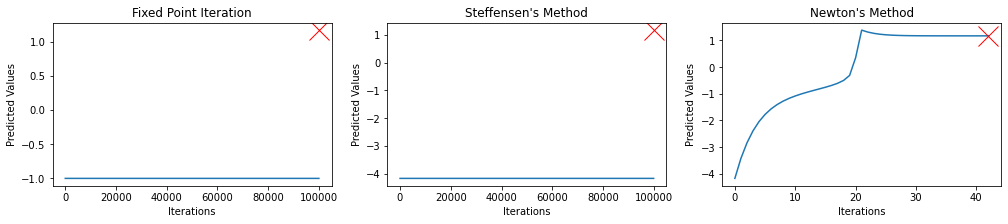

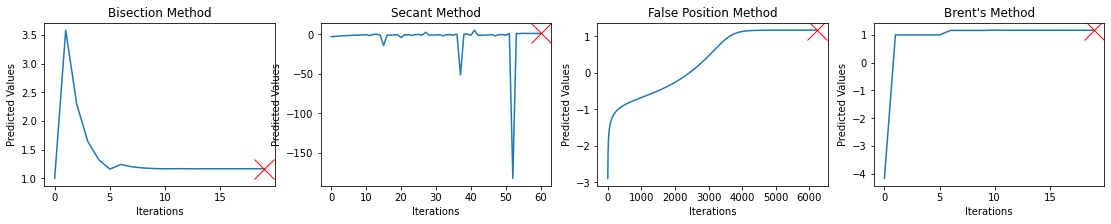

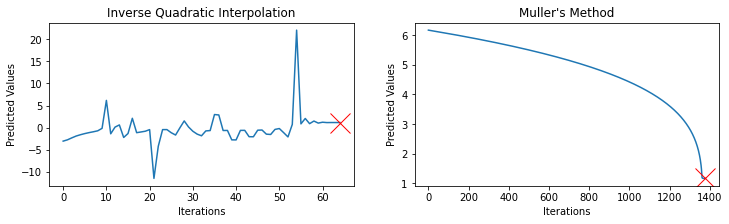

In [74]:
# Graphing results of all methods
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (17, 3))

# Fixed point iteration method graph - prediction is hardcoded because method is unreliable and will crash otherwise
outcome, output, iterations, path, t = fixed_point_iteration(equation, 1, tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Fixed Point Iteration")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Steffensen's method graph
outcome, output, iterations, path, t = steffensen(equation, prediction[1], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[1].title.set_text("Steffensen's Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Newton's method graph
outcome, output, iterations, path, t = newton(equation, prediction[1], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[2].title.set_text("Newton's Method")
ax[2].set_xlabel("Iterations")
ax[2].set_ylabel("Predicted Values")
ax[2].plot([i for i in range(len(path))], path)
for i in answer:
    ax[2].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Graphing results of all methods
fig, ax = plt.subplots(nrows=1, ncols=4, figsize= (19, 3))

# Bisection method graph
outcome, output, iterations, path, t = bisection(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Bisection Method")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Secant method graph
outcome, output, iterations, path, t = secant(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[1].title.set_text("Secant Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# False Position method graph
outcome, output, iterations, path, t = false_position(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[2].title.set_text("False Position Method")
ax[2].set_xlabel("Iterations")
ax[2].set_ylabel("Predicted Values")
ax[2].plot([i for i in range(len(path))], path)
for i in answer:
    ax[2].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Brent's method graph
outcome, output, iterations, path, t = brent(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[3].title.set_text("Brent's Method")
ax[3].set_xlabel("Iterations")
ax[3].set_ylabel("Predicted Values")
ax[3].plot([i for i in range(len(path))], path)
for i in answer:
    ax[3].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Graphing results of all methods
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (12, 3))

# Inverse Quadratic Interpolation
outcome, output, iterations, path, t = inverse_quadratic(equation, prediction[0], prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Inverse Quadratic Interpolation")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")


# Muller's's method graph
outcome, output, iterations, path, t = muller(equation, prediction[0], prediction[1], prediction[2], tolerance, maximum_iterations)
storeData("Success", output, answer[0], iterations, t)
ax[1].title.set_text("Muller's Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

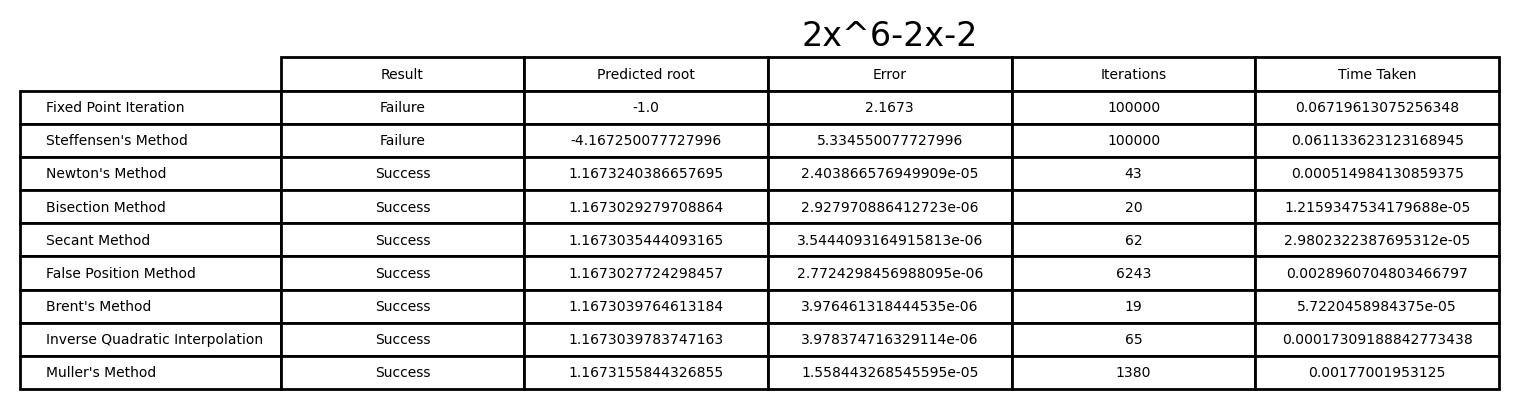

In [75]:
# Putting the results of reliability test 1 into a table
fig, ax = plt.subplots(dpi=200, figsize = (9,2.15))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title(equations[1])
df = pd.DataFrame({"Result": data[0:45:5], "Predicted root": data[1:45:5], "Error": data[2:45:5],
                   "Iterations": data[3:45:5], "Time Taken": data[4:45:5]})
ax.table(cellText=df.values, rowLabels=["Fixed Point Iteration", "Steffensen's Method",
                                        "Newton's Method", "Bisection Method",
                                        "Secant Method", "False Position Method",
                                        "Brent's Method", "Inverse Quadratic Interpolation",
                                        "Muller's Method"],
         colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [76]:
# Reliability test 2
equation = lambda x: 2*x**6 - 2*x - 2
answer = solutions[1]
prediction = predictions[1]

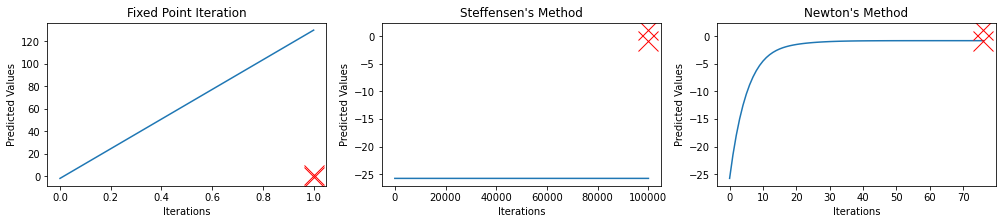

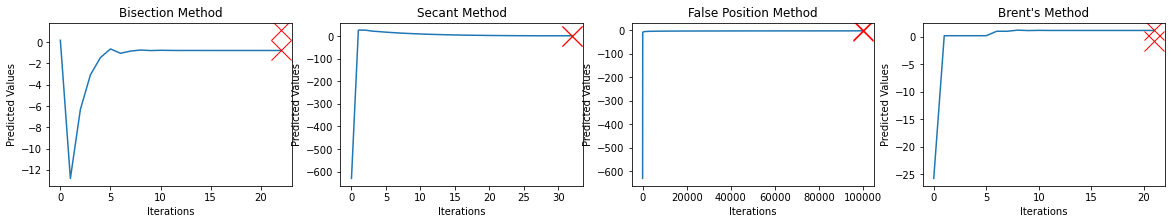

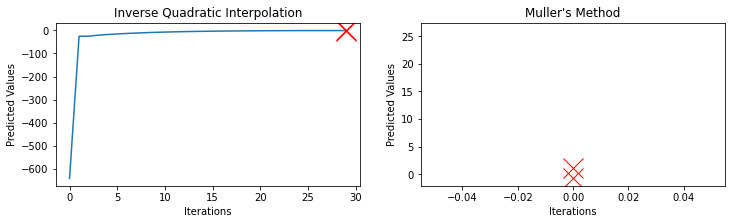

In [77]:
# Graphing results of all methods
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (17, 3))

# Fixed point iteration method graph - prediction is hardcoded because method is unreliable and will crash otherwise
outcome, output, iterations, path, t = fixed_point_iteration(equation, 1, tolerance, 3)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Fixed Point Iteration")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
   ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Steffensen's method graph
outcome, output, iterations, path, t = steffensen(equation, prediction[1], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[1].title.set_text("Steffensen's Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Newton's method graph
outcome, output, iterations, path, t = newton(equation, prediction[1], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[2].title.set_text("Newton's Method")
ax[2].set_xlabel("Iterations")
ax[2].set_ylabel("Predicted Values")
ax[2].plot([i for i in range(len(path))], path)
for i in answer:
    ax[2].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Graphing results of all methods
fig, ax = plt.subplots(nrows=1, ncols=4, figsize= (20, 3))

# Bisection method graph
outcome, output, iterations, path, t = bisection(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Bisection Method")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Secant method graph
outcome, output, iterations, path, t = secant(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[1], iterations, t)
ax[1].title.set_text("Secant Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# False Position method graph
outcome, output, iterations, path, t = false_position(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[2].title.set_text("False Position Method")
ax[2].set_xlabel("Iterations")
ax[2].set_ylabel("Predicted Values")
ax[2].plot([i for i in range(len(path))], path)
for i in answer:
    ax[2].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Brent's method graph
outcome, output, iterations, path, t = brent(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[1], iterations, t)
ax[3].title.set_text("Brent's Method")
ax[3].set_xlabel("Iterations")
ax[3].set_ylabel("Predicted Values")
ax[3].plot([i for i in range(len(path))], path)
for i in answer:
    ax[3].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Graphing results of all methods
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (12, 3))

# Inverse Quadratic Interpolation
outcome, output, iterations, path, t = inverse_quadratic(equation, prediction[0], prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Inverse Quadratic Interpolation")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")


# Muller's method graph
outcome, output, iterations, path, t = muller(equation, prediction[0], prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[1].title.set_text("Muller's Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

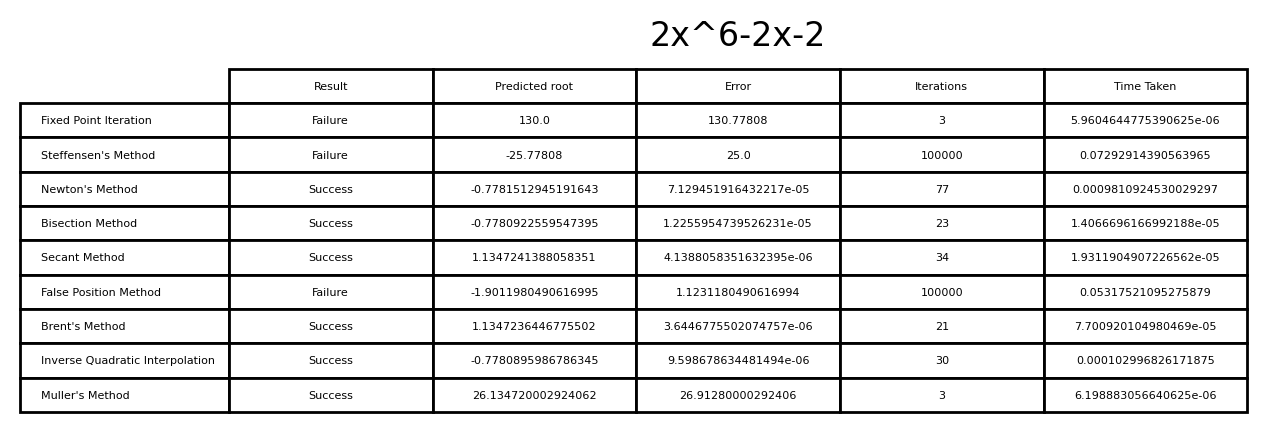

In [78]:
# Putting the results of reliability test 1 into a table
fig, ax = plt.subplots(dpi=200, figsize = (8,2.3))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title(equations[1])
df = pd.DataFrame({"Result": data[45:90:5], "Predicted root": data[46:90:5], "Error": data[47:90:5],
                   "Iterations": data[48:90:5], "Time Taken": data[49:90:5]})
ax.table(cellText=df.values, rowLabels=["Fixed Point Iteration", "Steffensen's Method",
                                        "Newton's Method", "Bisection Method",
                                        "Secant Method", "False Position Method",
                                        "Brent's Method", "Inverse Quadratic Interpolation",
                                        "Muller's Method"],
         colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [79]:
# Reliability test 2
equation = lambda x: 5*x**7-4*x**6-4*x-9
answer = solutions[2]
prediction = predictions[2]

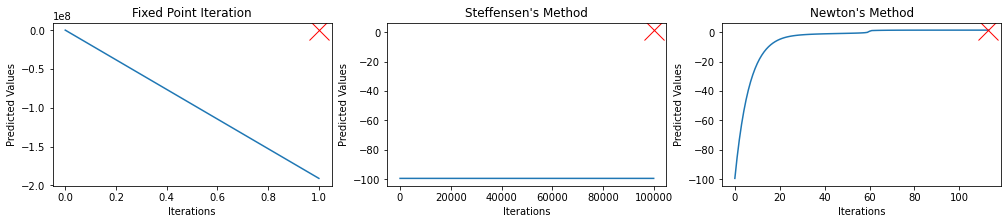

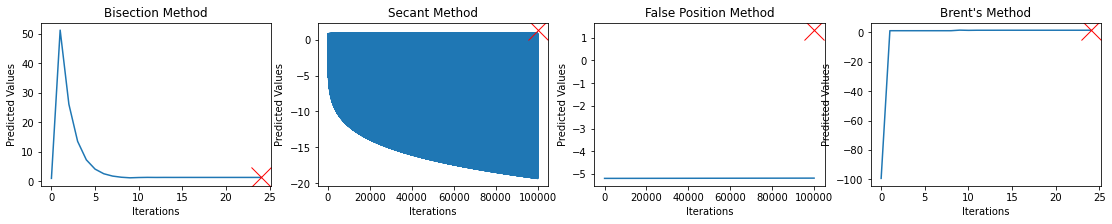

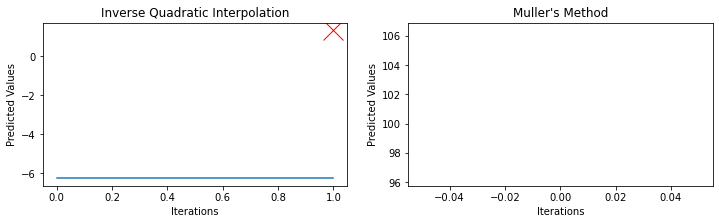

In [83]:
# Graphing results of all methods
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (17, 3))

# Fixed point iteration method graph - prediction is hardcoded because method is unreliable and will crash otherwise
outcome, output, iterations, path, t = fixed_point_iteration(equation, 1, tolerance, 3)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Fixed Point Iteration")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Steffensen's method graph
outcome, output, iterations, path, t = steffensen(equation, prediction[1], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[1].title.set_text("Steffensen's Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Newton's method graph
outcome, output, iterations, path, t = newton(equation, prediction[1], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[2].title.set_text("Newton's Method")
ax[2].set_xlabel("Iterations")
ax[2].set_ylabel("Predicted Values")
ax[2].plot([i for i in range(len(path))], path)
for i in answer:
    ax[2].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Graphing results of all methods
fig, ax = plt.subplots(nrows=1, ncols=4, figsize= (19, 3))

# Bisection method graph
outcome, output, iterations, path, t = bisection(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Bisection Method")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Secant method graph
outcome, output, iterations, path, t = secant(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[1].title.set_text("Secant Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# False Position method graph
outcome, output, iterations, path, t = false_position(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[2].title.set_text("False Position Method")
ax[2].set_xlabel("Iterations")
ax[2].set_ylabel("Predicted Values")
ax[2].plot([i for i in range(len(path))], path)
for i in answer:
    ax[2].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Brent's method graph
outcome, output, iterations, path, t = brent(equation, prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[3].title.set_text("Brent's Method")
ax[3].set_xlabel("Iterations")
ax[3].set_ylabel("Predicted Values")
ax[3].plot([i for i in range(len(path))], path)
for i in answer:
    ax[3].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Graphing results of all methods
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (12, 3))

# Inverse Quadratic Interpolation
outcome, output, iterations, path, t = inverse_quadratic(equation, prediction[0], prediction[1], prediction[2], tolerance, maximum_iterations)
storeData(outcome, output, answer[0], iterations, t)
ax[0].title.set_text("Inverse Quadratic Interpolation")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Predicted Values")
ax[0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Muller's method graph
outcome, output, iterations, path, t = muller(equation, prediction[0], prediction[1], prediction[2], tolerance, maximum_iterations)
storeData("Failure", output, answer[0], iterations, t)
ax[1].title.set_text("Muller's Method")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Predicted Values")
ax[1].plot([i for i in range(len(path))], path)
#for i in answer:
    #ax[1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

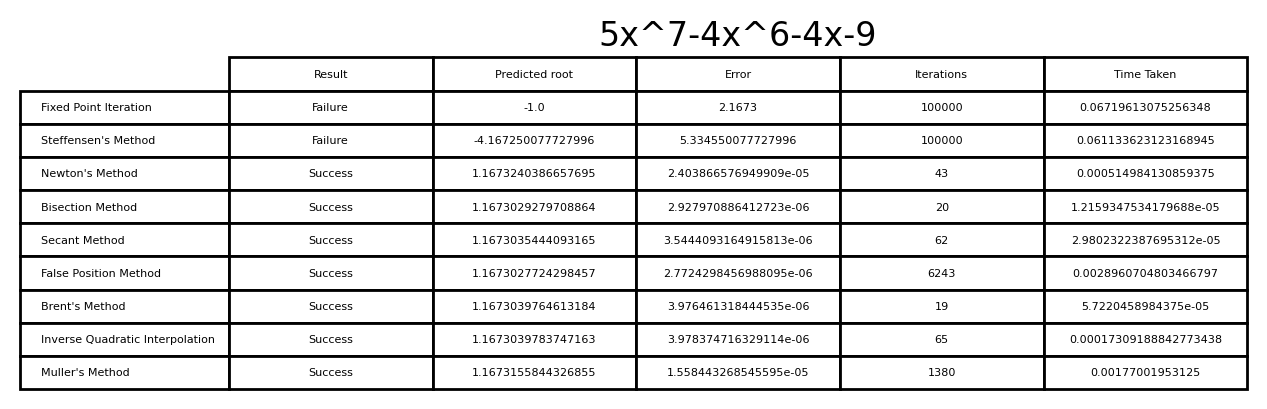

In [82]:
# Putting the results of reliability test 1 into a table
fig, ax = plt.subplots(dpi=200, figsize = (8,2.15))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title(equations[2])
df = pd.DataFrame({"Result": data[0:45:5], "Predicted root": data[1:45:5], "Error": data[2:45:5],
                   "Iterations": data[3:45:5], "Time Taken": data[4:45:5]})
ax.table(cellText=df.values, rowLabels=["Fixed Point Iteration", "Steffensen's Method",
                                        "Newton's Method", "Bisection Method",
                                        "Secant Method", "False Position Method",
                                        "Brent's Method", "Inverse Quadratic Interpolation",
                                        "Muller's Method"],
         colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()